In [18]:
# Importing Liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Loading CSV file
df = pd.read_csv('Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8399 non-null   int64  
 1   Ord_id                8399 non-null   object 
 2   Prod_id               8399 non-null   object 
 3   Ship_id               8399 non-null   object 
 4   Cust_id               8399 non-null   object 
 5   Sales                 8399 non-null   float64
 6   Discount              8395 non-null   float64
 7   Order_Quantity        8399 non-null   int64  
 8   Profit                8399 non-null   float64
 9   Shipping_Cost         8399 non-null   float64
 10  Product_Base_Margin   8336 non-null   float64
 11  Product_Category      8398 non-null   object 
 12  Product_Sub_Category  8399 non-null   object 
 13  Customer_Name         8399 non-null   object 
 14  Province              8399 non-null   object 
 15  Region               

In [20]:
# Handle missing values and Drop redundant columns
df = df.drop(columns=['Unnamed: 0', 'Ord_id', 'Ord_id_new', 'Cust_id', 'Cust_id_new'])
df['Discount'] = df['Discount'].fillna(df['Discount'].median())
df['Product_Base_Margin'] = df['Product_Base_Margin'].fillna(df['Product_Base_Margin'].median())
df.dropna(subset=['Product_Category', 'Region', 'Customer_Segment'], inplace=True)

In [21]:
# Convert Ship_Date to datetime
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce', dayfirst=True)

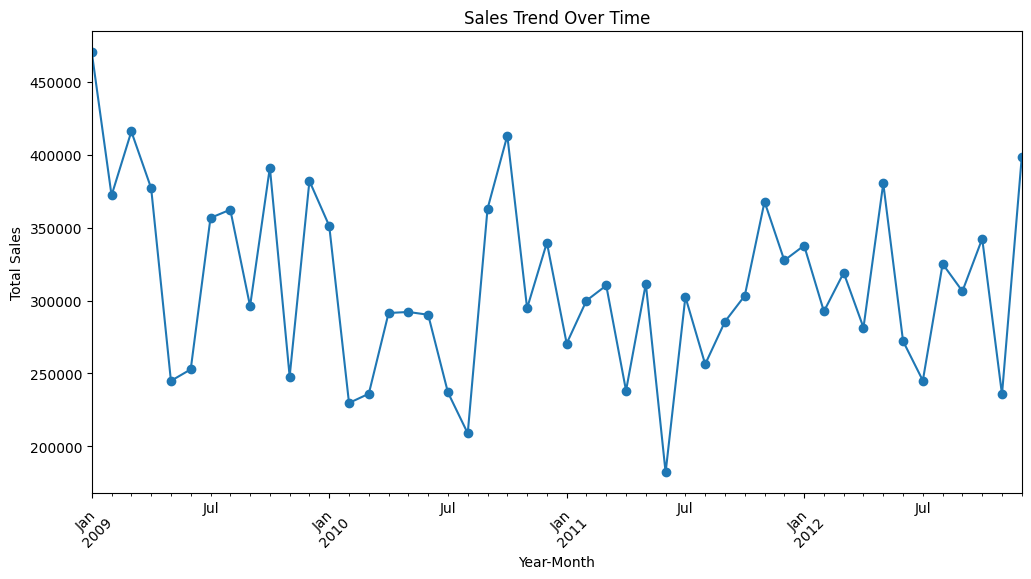

In [22]:
# Sales Trend Over Time
plt.figure(figsize=(12, 6))
df['YearMonth'] = df['Ship_Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Sales'].sum()
sales_trend.plot(kind='line', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

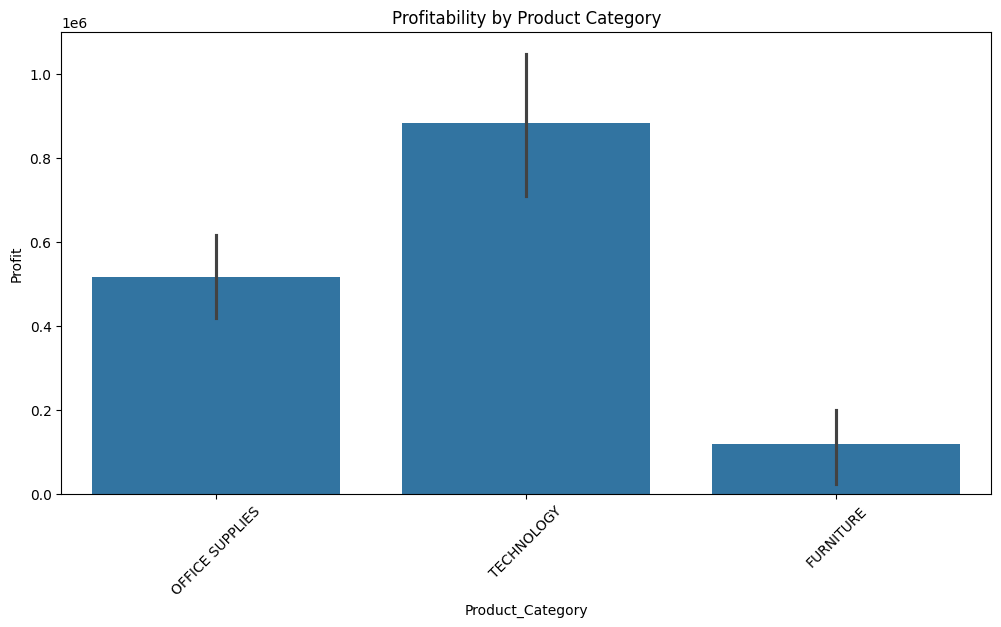

In [23]:
# Profitability by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Product_Category', y='Profit', estimator=np.sum)
plt.xticks(rotation=45)
plt.title('Profitability by Product Category')
plt.show()

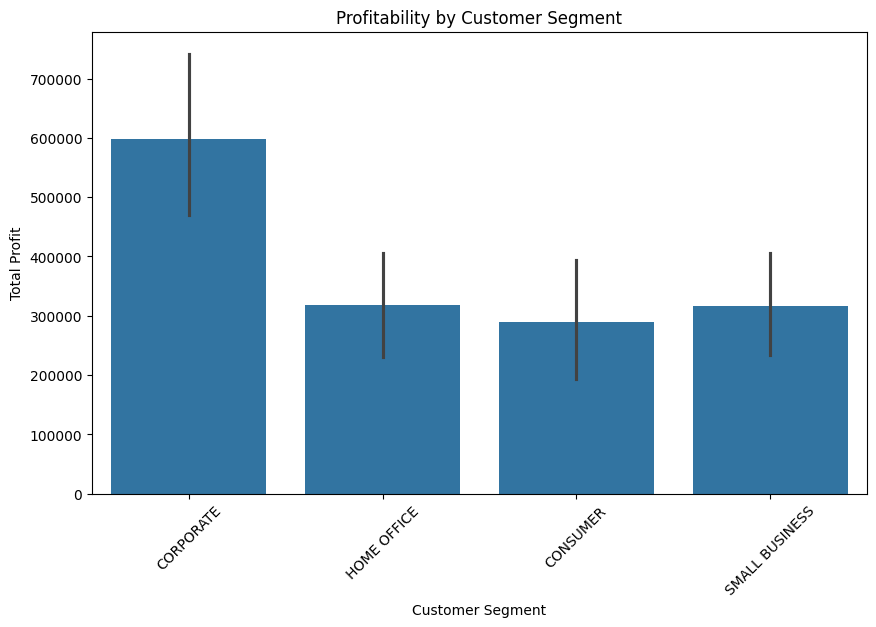

In [24]:
# Most Profitable Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Customer_Segment', y='Profit', estimator=np.sum)
plt.title('Profitability by Customer Segment')
plt.ylabel('Total Profit')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.show()

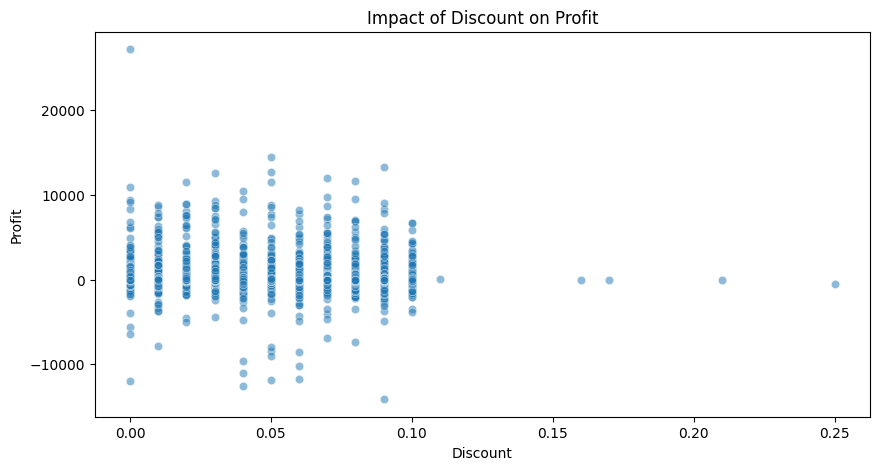

In [25]:
# Impact of Discount on Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Impact of Discount on Profit')
plt.show()

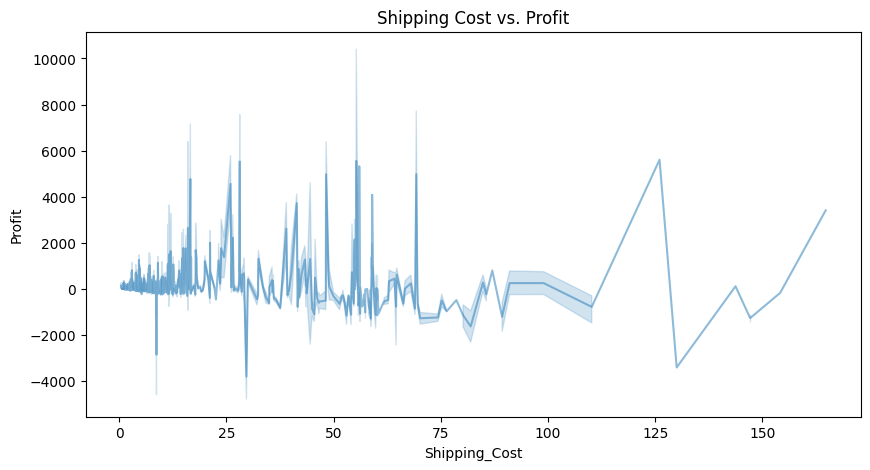

In [30]:
# Shipping Cost vs. Profit
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Shipping_Cost', y='Profit', alpha=0.5)
plt.title('Shipping Cost vs. Profit')
plt.show()

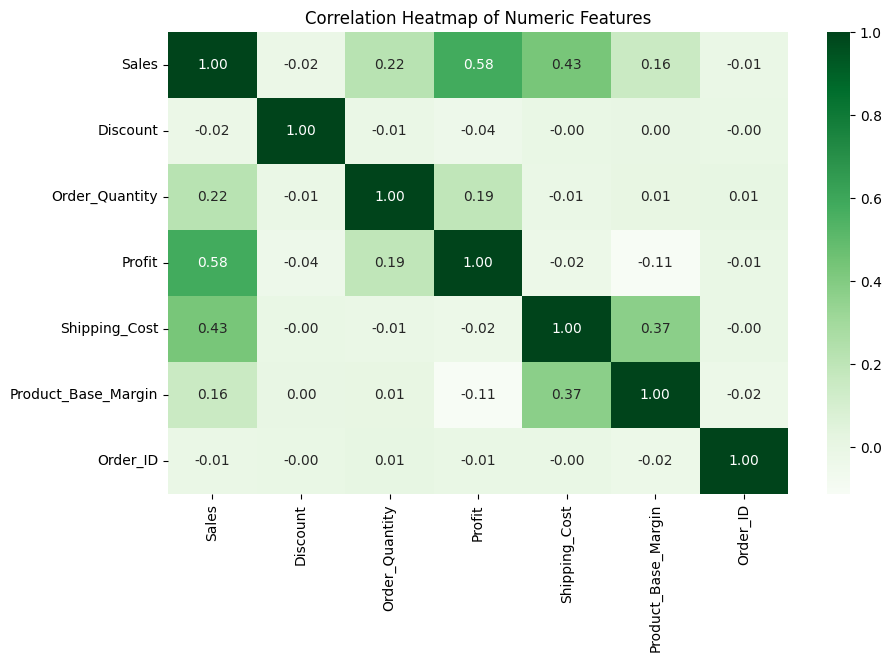

In [34]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()